# AIDL 2021 Recruit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Reading

In [6]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


# Data Exploration

In [34]:
#check whether there is any null column
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [35]:
#read the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               800 non-null    object
 1   Watch time(Minutes)   800 non-null    int64 
 2   Stream time(minutes)  800 non-null    int64 
 3   Peak viewers          800 non-null    int64 
 4   Average viewers       800 non-null    int64 
 5   Followers             800 non-null    int64 
 6   Followers gained      800 non-null    int64 
 7   Views gained          800 non-null    int64 
 8   Partnered             800 non-null    int64 
 9   Mature                800 non-null    int64 
 10  Language              800 non-null    object
dtypes: int64(9), object(2)
memory usage: 68.9+ KB


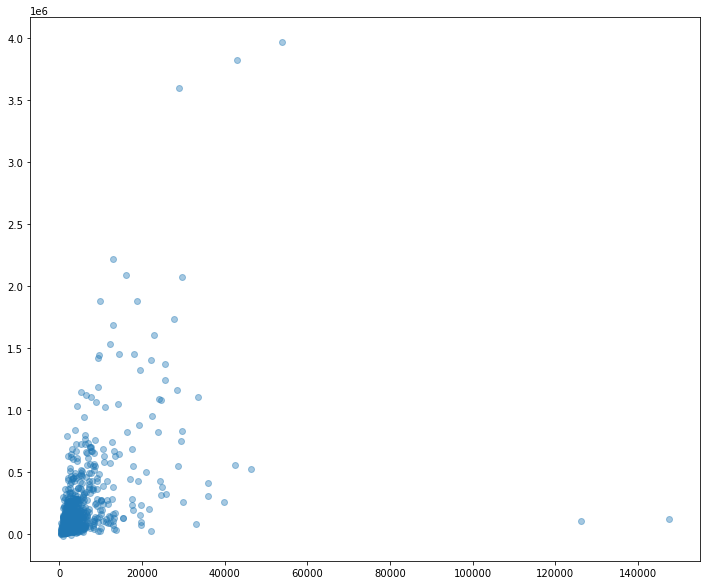

In [36]:
#Data visualization - correlation between average viewers and followers gained
plt.figure(figsize=(12,10))
plt.scatter(df[['Average viewers']], df[['Followers gained']], alpha=0.4)
plt.show()

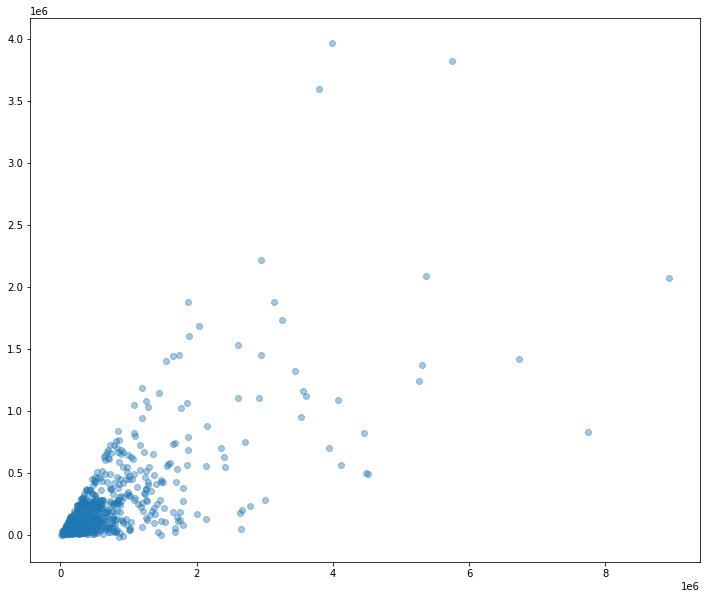

In [37]:
#Data visualization - correlation between followers and followers gained
plt.figure(figsize=(12,10))
plt.scatter(df[['Followers']], df[['Followers gained']], alpha=0.4)
plt.show()

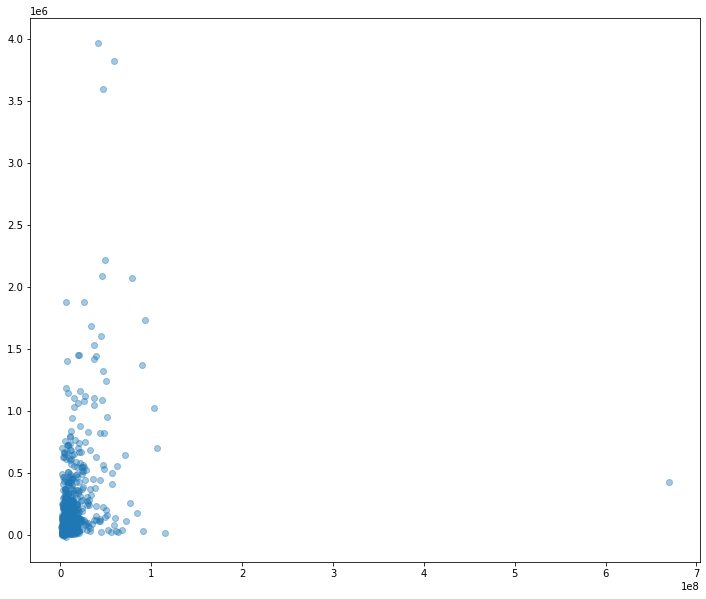

In [38]:
#Data visualization - correlation between views gained and followers gained
plt.figure(figsize=(12,10))
plt.scatter(df[['Views gained']], df[['Followers gained']], alpha=0.4)
plt.show()

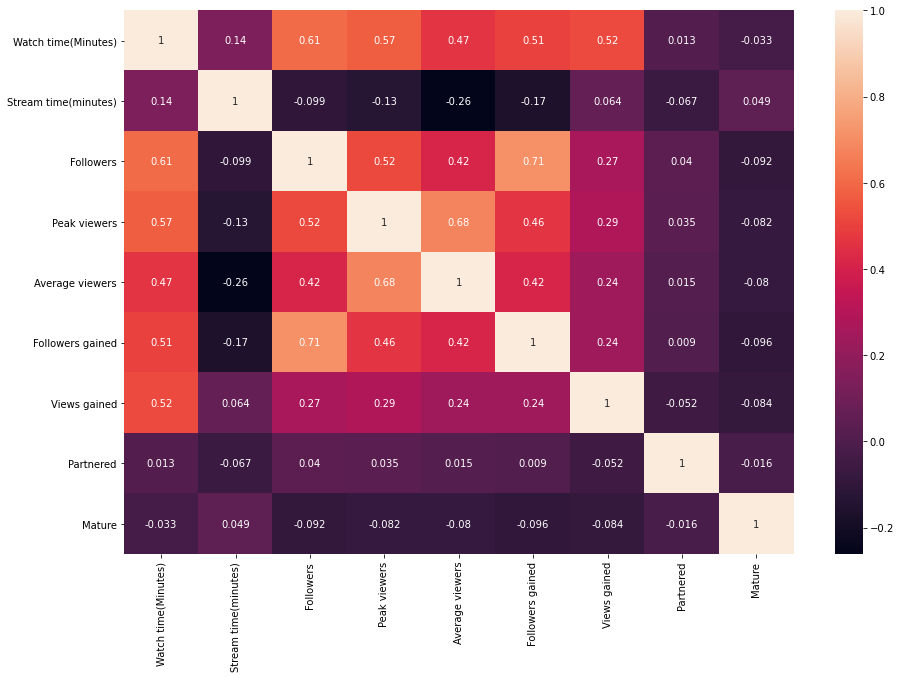

In [39]:
#find the correlation between columns
plt.figure(figsize=(15,10))
sns.heatmap(df[['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers','Peak viewers','Average viewers','Followers gained','Views gained','Partnered','Mature','Language']].corr(), annot = True)
plt.show()

# Training and Testing Dataset

In [40]:
from sklearn.model_selection import train_test_split

#separate data set into training and testing sets
df1 = df.copy()
x = df1[['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']]
y = df1['Followers gained']

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.75, test_size = 0.25)

## 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_predict = linear.predict(x_test)

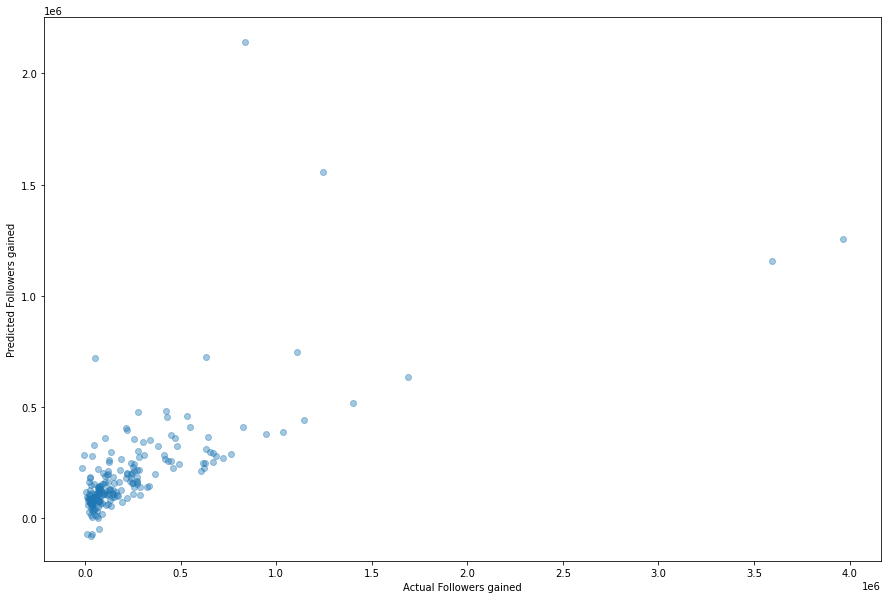

In [41]:
#compare actual and predicted followers gained by visualizing graph
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Followers gained")
plt.ylabel("Predicted Followers gained")
plt.show()

In [42]:
#use real test csv file
test = pd.read_csv("test.csv")
my_test = test[['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']]
test_pred = linear.predict(my_test)
int_test = test_pred.astype(int)
print("Follower Gained by the streamers",int_test)

Follower Gained by the streamers [ 148904   80734  152062  113736   59704  123106   74134   87079   49847
  123819  188285  146156  157087   34301   85411   59467  294633   47539
   49816   98732  134154  279851   65372   94811   63922  238252  219738
   47235 -102757   43327  186006   93328  151198   47871   76288   39764
   45745    6896   79280  105379   68154  256756  152623   63628  100026
   43178   84167   58039  140496   62337  256055   57252  129493  311669
   44344   99043   88293   80546  200418  180771  166662   94206   52492
   54040  207895   45569  194245  153642   65178  103813   75010   97658
   52508  173898  136818   46667   84958   53876  116079  191533  178862
   28532   85842   69162   78841  177575   42402  156591   44133  119704
  -97376   72605   98057   64600   43628   41186  121177   81573  126891
   70286  247277  180007  216274   33951  104711  103660  113394   50578
    6466   68344  178285  116042   81052   57580  144746   -8088   99605
  124796   94609  

In [43]:
#print linear coefficient value
print(linear.coef_)

[ 4.65225412e-05 -3.63690352e-01  2.45974134e-02  9.86614289e-01
  2.58165184e-01  2.24993109e-04]


In [44]:
#print accuracy of the prediction
print(linear.score(x_train, y_train))

0.5813790794972206


## 2. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

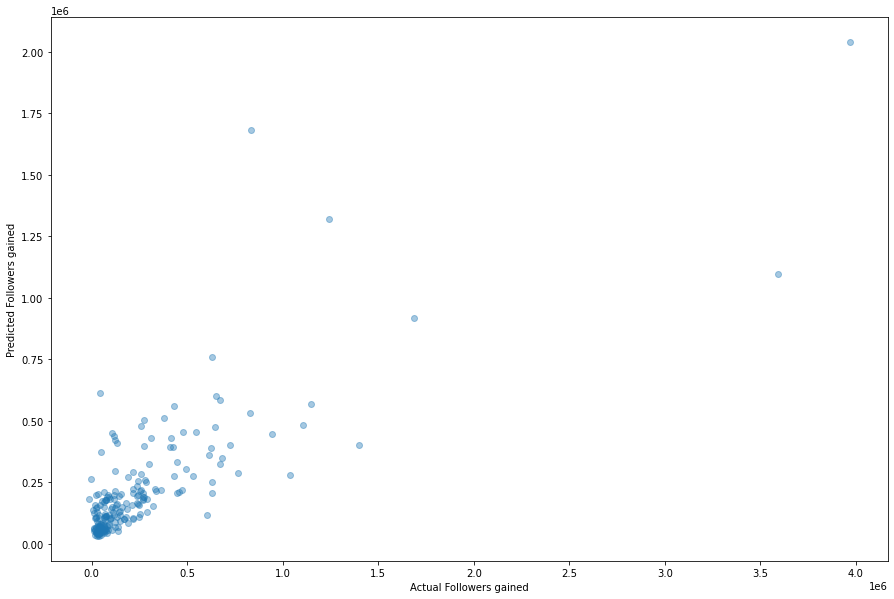

In [45]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
y_predict = forest.predict(x_test)

#compare actual and predicted followers gained by visualizing graph
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Followers gained")
plt.ylabel("Predicted Followers gained")
plt.show()

In [46]:
#prediction of random forest regression model
test_pred = forest.predict(my_test)
int_test = test_pred.astype(int)
print("Follower Gained by the streamers",int_test)

Follower Gained by the streamers [156536  48377 161137 121503  57719 117844  73251  99098  79349 164334
 214090 127460 142783  55145  99671  43374 486791  31429  59788  83132
 142721 540801  72253  96568  53229 284181  81008  67520  16343  38414
 230508  56375 188405  49525  41695  37870  53038  25178  51587  68459
 110713 293547 161059  41520 115056  23855  67709  48586 184997  55527
 306254  33876 100514 389684  46446 117854  63168  59689 163770 204987
 148551 105035  57028  66768 157219  41675 313162 208070  36233  77872
  44872 101825  63629 234801 131964  43831  86891  43333 133526 223911
 299060  48532  92087  77708  48733 202070  31609 231253  53118 115430
  28432  56546  83504  64562  65779  66301 135566 112890 112745  91570
 299470 129201 132014  48284 115355  77886 102608  46564  39819  97648
 158636 105053  39021  46825 206459  21400  77670 184102  52337 171356
 120114  80364  52636  24163 627811 154903  35726 617516  77464  66926
 129103  99516 229047  79494  61288 158937  

In [47]:
#print accuracy of the prediction
print(forest.score(x_train, y_train))

0.930877514583933


# Saving Data Outcome

In [32]:
#Since random forest regression has higher accuracy, save output in csv file
# list of channel and followers gained
channel = test['Channel']
fol_gained = int_test

# dictionary of lists  
dict = {'Channel': channel, 'Followers gained': int_test}  

df_final = pd.DataFrame(dict) 

# saving the dataframe 
df_final.to_csv('sample submission3.csv', index=False) 